# Functions

As you develop more complex computer code, it becomes increasingly
important to organize your code into modular blocks. 

User-defined functions
are a lot like built-in functions that we have encountered in core
Python as well as in NumPy and Matplotlib. The main difference is that
user-defined functions are written by you. The idea is to define
functions to simplify your code and to allow you to reuse the same code
in different contexts.

## User-defined functions

The NumPy package contains a lot of mathematical functions. 
However, you may nevertheless find that you
need a function that is not available in the NumPy Python library. In
those cases, you will want to write your own function.

In studies of optics and signal processing one often runs into the sinc
function, which is defined as

$$\mathrm{sinc}\,x \equiv \frac{\sin x}{x} \;.$$

Let's write a Python function for the sinc function. Here is our first
attempt:

In [15]:
import numpy as np
def sinc(x): 
    y = np.sin(x)/x 
    return y

Every function definition begins with the word `def` followed by the
name you want to give to the function, `sinc` in this case, then a list
of arguments enclosed in parentheses, and finally terminated with a
colon. 

In this case there is only one argument, `x`, but in general
there can be as many arguments as you want, including no arguments at
all. 

The indented block of code following the first line defines what the
function does. In this case, the first line calculates
$\mathrm{sinc}\,x = \sin x/x$ and sets it equal to `y`. The `return`
statement of the last line tells Python to return the value of `y` to
the user.

In [16]:

sinc(4)

-0.18920062382698205

In [17]:
a = sinc(1.2)

In [18]:
a

0.7766992383060219

In [19]:
np.sin(1.2)/1.2 

0.7766992383060219

In [23]:
x=np.array([1,2]) # x is an array with 2 numbers
sinc(x)

array([0.84147098, 0.45464871])

Inputs and outputs 4 and 5 verify that the function does indeed give the
same result as an explicit calculation of $\sin x/x$.

You may have noticed that there is a problem with our definition of
$\mathrm{sinc}\,x$ when `x=0.0`. Let's try it out and see what happens

In [24]:
sinc(0.0)

<ipython-input-15-48f1e287303f>:3: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sin(x)/x


nan

IPython returns `nan` or "not a number", which occurs when Python
attempts a division by zero, which is not defined. This is not the
desired response as $\mathrm{sinc}\,x$ is, in fact, perfectly well
defined for $x=0$. 

You can verify this using L'Hopital's rule, which you
may have learned in your study of calculus, or you can ascertain the
correct answer by calculating the Taylor series for $\mathrm{sinc}\,x$.
Here is what we get

$$\mathrm{sinc}\,x = \frac{\sin x}{x} 
                = \frac{x - \frac{x^3}{3!} + \frac{x^5}{5!} + ...}{x} 
                = 1 - \frac{x^2}{3!} + \frac{x^4}{5!} + ... \;.$$

$\mathrm{sinc}\,x$ is well-defined at and near $x=0$ and that $\mathrm{sinc}(0)=1$.

Let's modify our function so that it gives the correct value for `x=0`.

In [34]:
def sinc(x):  
    if np.abs(x)<1e-10:
        y = 1.0
    else:
        y = np.sin(x)/x
    return y

In [35]:
sinc(0)

1.0

In [36]:
sinc(1.2)

0.7766992383060219

### Looping over arrays in user-defined functions

The code for $\mathrm{sinc}\,x$ works just fine when the argument is a
single number or a variable that represents a single number. However, if
the argument is a NumPy array, we run into a problem, as illustrated
below.

In [37]:
x = np.arange(0, 5., 0.5)

In [38]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [39]:
sinc(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The `if` statement in Python is set up to evaluate the truth value of a
single variable, not of multi-element arrays. 

An obvious way to handle this problem is to write the code so that it
processes the array one element at a time, which you could do using a
`for` loop.

In [69]:
def sinc(x):  
    y = [] # creates an empty list to store results 
    for xx in x: # loops over all elements in x array 
        if xx == 0.0: # adds result of 1.0 to y list if 
            y = y + [1.0] # xx is zero 
        else: # adds result of sin(xx)/xx to y list if 
            y = y + [np.sin(xx)/xx] # xx is not zero 
    return np.array(y) #converts y to array and returns array

In [70]:
a=np.arange(-10,11,1)
a

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [71]:
for i in a:
    print(i)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


In [59]:
for i in range(0,len(a)):
    print(i,a[i])

0 -10
1 -9
2 -8
3 -7
4 -6
5 -5
6 -4
7 -3
8 -2
9 -1
10 0
11 1
12 2
13 3
14 4
15 5
16 6
17 7
18 8
19 9
20 10


In [62]:
sinc(x)

array([ 1.        ,  0.95885108,  0.84147098,  0.66499666,  0.45464871,
        0.23938886,  0.04704   , -0.10022378, -0.18920062, -0.21722892])

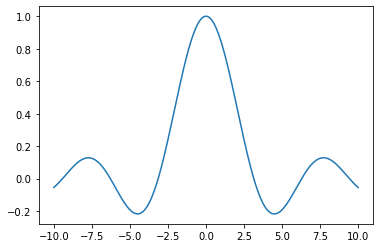

In [63]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 256) 
y = sinc(x)

plt.plot(x, y) 

The `for` loop evaluates the elements of the `x` array one by one and
appends the results to the list `y` one by one. When it is finished, it
converts the list to an array and returns the array. The code following
the function definition plots $\mathrm{sinc}\,x$ as a function of $x$.

In the program above, you may have noticed that the NumPy library is
imported *after* the `sinc(x)` function definition. As the function uses
the NumPy functions `sin` and `array`, you may wonder how this program
can work. Doesn't the `import numpy` statement have to be called before
any NumPy functions are used? The answer it an emphatic "YES". 

The function definition is *not executed*
when it is defined, nor can it be as it has no input `x` data to
process. That part of the code is just a definition. 

### Fast array processing in user-defined functions

While using loops to process arrays works just fine, it is usually not
the best way to accomplish the task in Python. The reason is that loops
in Python are executed rather slowly. 

To deal with this problem, the
developers of NumPy introduced a number of functions designed to process
arrays quickly and efficiently. 

The
function we want is called `where` and it is a part of the NumPy
library. There `where` function has the form

```python
where(condition, output if True, output if False)
```

The first argument of the `where` function is a conditional statement
involving an array. The `where` function applies the condition to the
array element by element, and returns the second argument for those
array elements for which the condition is `True`, and returns the third
argument for those array elements that are `False`. 

In [68]:
def sinc(x):  
    z = np.where(x==0.0, 1.0, np.sin(x)/x) 
    return z
print(y)

[-0.05440211 -0.04803743 -0.04127361 -0.03414533 -0.02668998 -0.01894748
 -0.01096007 -0.00277214  0.00557001  0.01401842  0.02252371  0.03103534
  0.03950189  0.04787134  0.05609135  0.06410955  0.07187388  0.07933283
  0.08643581  0.09313337  0.09937761  0.10512236  0.11032357  0.11493952
  0.11893116  0.12226232  0.12490001  0.12681462  0.12798018  0.12837455
  0.12797963  0.12678151  0.12477064  0.12194197  0.11829503  0.11383406
  0.10856804  0.10251076  0.09568081  0.08810159  0.07980125  0.07081269
  0.0611734   0.05092539  0.04011507  0.02879304  0.01701398  0.00483636
 -0.00767773 -0.02046284 -0.03345045 -0.04656925 -0.05974546 -0.07290312
 -0.08596449 -0.09885034 -0.11148037 -0.12377356 -0.13564856 -0.14702408
 -0.15781932 -0.16795431 -0.17735036 -0.18593045 -0.19361961 -0.20034534
 -0.20603798 -0.21063108 -0.21406177 -0.21627113 -0.21720451 -0.21681184
 -0.21504798 -0.21187294 -0.2072522  -0.2011569  -0.1935641  -0.18445693
 -0.17382478 -0.16166343 -0.14797514 -0.13276873 -0

In [77]:
y=10
def sinc(x):
    y=np.sin(x)/x
    return y

In [78]:
sinc(4)

-0.18920062382698205

In [79]:
print(y)

10


The `where` function creates an array and sets the elements of the array
equal to 1.0 where the corresponding elements of `x` are zero, and
otherwise sets the corresponding elements to `sin(x)/x`.

The moral of the story is that you should avoid using `for` and `while`
loops to process arrays in Python programs whenever an array-processing
method is available. 


## Functions with more (or less) than one input or output

Python functions can have any number of input arguments and can return
any number of variables. 


Suppose you want a function that
outputs $n$ $(x,y)$ coordinates around a circle of radius $r$ centered
at the point $(x_0,y_0)$. The inputs to the function would be $r$,
$x_0$, $y_0$, and $n$. The outputs would be the $n$ $(x,y)$ coordinates.
The following code implements this function.

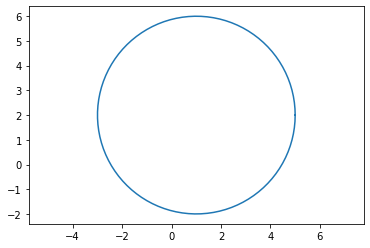

In [84]:
def circle(r, x0, y0, n):  
    theta = np.linspace(0., 2.*np.pi, n) 
    x = r * np.cos(theta) 
    y = r * np.sin(theta) 
    return x0+x, y0+y

import matplotlib.pyplot as plt

x,y = circle(4, 1., 2., 100)
plt.plot(x,y)
plt.axis('equal');

Functions can also return nothing to the calling program but just
perform some task.

In [2]:
def info():
    print("I am fine\n")


In [3]:
info()

I am fine



# [Exercise 08](./EX08-function.ipynb)